In [21]:
import sys
import os
import numpy
print(sys.executable)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import importlib
seaborn_found = importlib.util.find_spec('seaborn')
if seaborn_found is None:
    sys.write.stderr("[error] Seaborn package not found. exit")
    exit(-1)

import seaborn as sns
import pandas as pd

import matplotlib as mpl

#mpl.use("pgf")

import matplotlib.pyplot as plt

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
    "pgf.preamble": [
         "\\usepackage{units}",          # load additional packages
         "\\usepackage{metalogo}",
         "\\usepackage{unicode-math}",   # unicode math setup
         r"\setmathfont{xits-math.otf}",
         ]
})


plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times"],                    # use latex default serif font
    "font.size": "22",
})

plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "pgf.preamble": [
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{cmbright}",
         ]
})

# plt.rc('text', usetex=True)

sns.set(style="ticks", color_codes=True, font_scale=1.3)
sns.set_context("paper", rc={"axes.labelsize":14, "axes.titlesize":14, "legend.fontsize":14, "xtick.labelsize":14, "ytick.labelsize":14, "font.size":14})

sns.set_style("darkgrid", {'xtick.bottom': True, 'xtick.top': False, 'ytick.left': True, 'ytick.right': False, 'axes.grid': True, "axes.facecolor": ".9", 'grid.linestyle': '-', 'lines.linewidth':2.5})
# sns.set_palette("dark")

DIR_REAL_DATA="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/swarp/"
DIR_SIMU="/Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/simulation/output"

fig_size_square = (5, 4)
fig_size_rect = (6.5, 4)

/usr/local/opt/python/bin/python3.7


In [22]:
# csv_file = DIR+"/simu-bb-runs2020-1c.csv"
# csv_file = DIR+"/simu-bb_runs2020-Xc.csv"
csv_file_cori = DIR_SIMU+"/simu-cori-bb-runs2020-32c.csv"
csv_file_summit = DIR_SIMU+"/simu-summit-bb-runs2020-32c.csv"

CORE="32"
PLOT_DIR=os.getcwd()
# PLOT_DIR="/Users/lpottier/research/usc-isi/projects/paper-workflow-bb/figures/plots/simu-swarp"

OUTPUT = PLOT_DIR+"/"+"simu-bb_runs2020-32c/"

In [23]:
try:
    # Create target Directory
    os.mkdir(OUTPUT)
    print("Directory " , OUTPUT ,  " Created ") 
except FileExistsError:
    print("Directory " , OUTPUT ,  " already exists")

Directory  /Users/lpottier/research/usc-isi/projects/active/workflow-io-bb/data/traces/notebooks/simu-bb_runs2020-32c/  already exists


In [27]:
df_cori = pd.read_csv(csv_file_cori, sep=' ')
df_summit = pd.read_csv(csv_file_summit, sep=' ')

df = pd.concat([df_cori, df_summit])
df["BB_TYPE"]= df["BB_TYPE"].str.replace("SUMMIT", "ONNODE", case = False)

df_priv = df[df.BB_TYPE=="PRIVATE"]
df_strip = df[df.BB_TYPE=="STRIPED"]
df_onnode = df[df.BB_TYPE=="ONNODE"]

CORE="32"
# print(df.head())
# df.rename(columns={"FILES": "BB_NB_FILES", "CORES": "NB_CORES"}, errors="raise")

df.agg = df.groupby(['ID', 'BB_NB_FILES','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'], as_index=False).agg({'MEASURED_MKSP_S': 'mean', 'ERR_MKSP': 'mean', 'SIMULATION_S': 'mean', 'MEASURED_WALLTIME_S': 'max', 'ERR_WALLTIME': 'max'})


In [28]:
df.agg.head()

,ID,BB_NB_FILES,FITS,BB_TYPE,AVG,NB_CORES,MEASURED_MKSP_S,ERR_MKSP,SIMULATION_S,MEASURED_WALLTIME_S,ERR_WALLTIME
0,105447,0,N,ONNODE,1,32,16.2751,0.048663,17.0671,20.1700,0.153838
1,105447,0,N,ONNODE,2,32,16.1151,0.052088,16.9545,19.7145,0.139996
2,105447,0,N,ONNODE,3,32,16.0451,0.053101,16.8971,19.6162,0.138616
3,105447,0,N,ONNODE,4,32,15.9331,0.054805,16.8063,19.8365,0.152758
4,105447,0,N,ONNODE,5,32,16.0931,0.051910,16.9285,20.0598,0.156098


In [39]:
df_real_cori = pd.read_csv(DIR_REAL_DATA+"/shared-cori/bb-runs2020-32c.csv", sep=' ')
df_real_summit = pd.read_csv(DIR_REAL_DATA+"/private-summit/runs-input-files-32c-1w.csv", sep=' ')
df_real = pd.concat([df_real_cori, df_real_summit])

# df.real = df.real.loc[df['BB_NB_FILES'].isin([0,8,16,24,32])]
# df.real = df.real[df.real.NB_CORES==int(CORE)]

big = pd.merge(df, df_real, on=['ID', 'BB_NB_FILES','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'])

bigagg = big.groupby(['ID', 'BB_NB_FILES','FITS', 'BB_TYPE', 'AVG', 'NB_CORES'], as_index=False).agg({'MEASURED_MKSP_S': 'mean', 'MAKESPAN_S': 'mean', 'SIMULATION_S': 'mean', 'MEASURED_WALLTIME_S': 'max', 'ERR_WALLTIME': 'max'})


In [40]:
bigagg['ERR'] = (abs(bigagg['MAKESPAN_S'] - bigagg['SIMULATION_S']) / bigagg['SIMULATION_S']) *100
bigagg.head()
bigagg['BB_NB_FILES'] = (bigagg['BB_NB_FILES']*100)/32.0

In [41]:
print(df.head())
print("BB_NB_FILES :", df.BB_NB_FILES.unique())
print("BB_TYPE     :", df.BB_TYPE.unique())
print("BB_TYPE     :", df.FITS.unique())
print("NB_PIPELINE :", df.NB_PIPELINE.unique())

         ID  AVG FITS  BB_TYPE     WORKFLOW     PLATFORM  NB_PIPELINE  \
0  30868782    1    Y  PRIVATE  swarp-0.dax  cori-1N.xml            1   
1  30868782    2    Y  PRIVATE  swarp-0.dax  cori-1N.xml            1   
2  30868782    3    Y  PRIVATE  swarp-0.dax  cori-1N.xml            1   
3  30868782    4    Y  PRIVATE  swarp-0.dax  cori-1N.xml            1   
4  30868782    5    Y  PRIVATE  swarp-0.dax  cori-1N.xml            1   

   PIPELINE  NB_CORES  BB_NB_FILES  DATA_MB   LATENCY  BANDWIDTH  \
0         1        32            0      0.0  0.615385        6.5   
1         1        32            0      0.0  0.615385        6.5   
2         1        32            0      0.0  0.615385        6.5   
3         1        32            0      0.0  0.615385        6.5   
4         1        32            0      0.0  0.615385        6.5   

   SIMULATION_S  MEASURED_MKSP_S  ERR_MKSP  MEASURED_WALLTIME_S  ERR_WALLTIME  
0       40.5827          36.3332  0.116959             100.1720      0.5

In [42]:
xlabel='Input files in burst buffers (%)'
ylabel='Execution time (s)'

# name = col.split("_")[0].lower()
is_FITS = bigagg['FITS']=="Y"
is_PRIVATE = bigagg['BB_TYPE']=="PRIVATE"
is_STRIPED = bigagg['BB_TYPE']=="STRIPED"
is_ONNODE = bigagg['BB_TYPE']=="ONNODE"

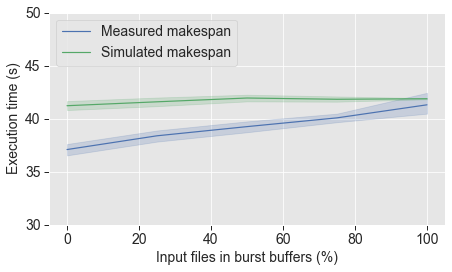

In [43]:

f = plt.figure(figsize=fig_size_rect)
f.patch.set_alpha(0)

g = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", data=bigagg[is_FITS & is_PRIVATE],  color="b", markers=True)
g = sns.lineplot(x="BB_NB_FILES", y="SIMULATION_S", data=bigagg[is_FITS & is_PRIVATE],  color="g", markers=True)

g.legend(loc='upper left', title='', labels=["Measured makespan", "Simulated makespan"])

g.set(xlabel=xlabel, ylabel=ylabel,ylim=(30,50))

plt.tight_layout()
plt.savefig(OUTPUT+'swarp-simu-private-mksp-files.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-simu-private-mksp-files.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()

In [44]:
print("PRIVATE: min error",
    min(bigagg[is_FITS & is_PRIVATE]['ERR']),
    ", avg error",
    numpy.mean(bigagg[is_FITS & is_PRIVATE]['ERR']),
    ", sd error",
    numpy.std(bigagg[is_FITS & is_PRIVATE]['ERR']),
    ", max error",
    max(bigagg[is_FITS & is_PRIVATE]['ERR']),
)

PRIVATE: min error 0.37121688249958956 , avg error 6.403748007796644 , sd error 3.078688200815108 , max error 15.515831482056495


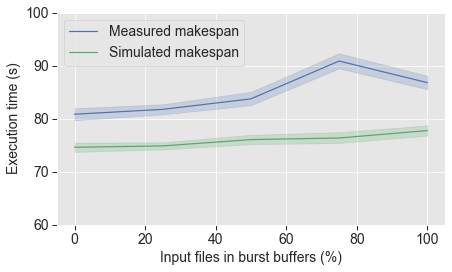

In [45]:
xlabel='Input files in burst buffers (%)'
ylabel='Execution time (s)'

# name = col.split("_")[0].lower()

f = plt.figure(figsize=fig_size_rect)
f.patch.set_alpha(0)

g = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", data=bigagg[is_STRIPED & is_FITS],  color="b", markers=True)
g = sns.lineplot(x="BB_NB_FILES", y="SIMULATION_S", data=bigagg[is_STRIPED & is_FITS],  color="g", markers=True)

g.legend(loc='upper left', title='', labels=["Measured makespan", "Simulated makespan"])
g.set(xlabel=xlabel, ylabel=ylabel,ylim=(60,100))

plt.tight_layout()
plt.savefig(OUTPUT+'swarp-simu-striped-mksp-files.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-simu-striped-mksp-files.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()


In [46]:
print("STRIPED: min error",
    min(bigagg[is_STRIPED & is_FITS]['ERR']),
    ", avg error",
    numpy.mean(bigagg[is_STRIPED & is_FITS]['ERR']),
    ", sd error",
    numpy.std(bigagg[is_STRIPED & is_FITS]['ERR']),
    ", max error",
    max(bigagg[is_STRIPED & is_FITS]['ERR']),
)

STRIPED: min error 7.391624558550778 , avg error 11.663493216957402 , sd error 4.048686246290616 , max error 24.14127646673223


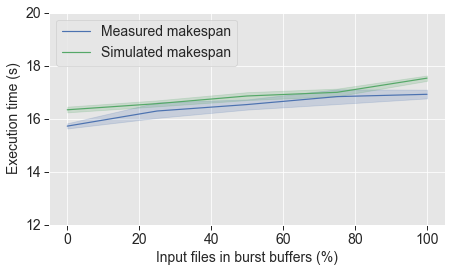

In [52]:
xlabel='Input files in burst buffers (%)'
ylabel='Execution time (s)'

# name = col.split("_")[0].lower()

f = plt.figure(figsize=fig_size_rect)
f.patch.set_alpha(0)

g = sns.lineplot(x="BB_NB_FILES", y="MAKESPAN_S", data=bigagg[is_ONNODE & is_FITS],  color="b", markers=True)
g = sns.lineplot(x="BB_NB_FILES", y="SIMULATION_S", data=bigagg[is_ONNODE & is_FITS],  color="g", markers=True)

g.legend(loc='upper left', title='', labels=["Measured makespan", "Simulated makespan"])
g.set(xlabel=xlabel, ylabel=ylabel,ylim=(12,20))

plt.tight_layout()
plt.savefig(OUTPUT+'swarp-simu-onnode-mksp-files.pdf', facecolor=f.get_facecolor(), edgecolor='none')
plt.savefig(OUTPUT+'swarp-simu-onnode-mksp-files.pgf', facecolor=f.get_facecolor(), edgecolor='none')
plt.show()

In [51]:
print("ONNODE: min error",
    min(bigagg[is_ONNODE & is_FITS]['ERR']),
    ", avg error",
    numpy.mean(bigagg[is_ONNODE & is_FITS]['ERR']),
    ", sd error",
    numpy.std(bigagg[is_ONNODE & is_FITS]['ERR']),
    ", max error",
    max(bigagg[is_ONNODE & is_FITS]['ERR']),
)

ONNODE: min error 1.3490185144545728 , avg error 6.87500324192261 , sd error 1.9195875324734557 , max error 11.27402064822791
